### Bike Sharing Demand
### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 1. Data Insights

In [77]:
df = pd.read_csv("day.csv")

In [78]:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [79]:
df.shape

(730, 16)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From info it is observed that there is no null data in the data set

In [81]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


1. From data description it is observed that, mean = 365.500 & median = 365.500,

2. There is not much more difference in mean and median 

3. From this observation we can conclude that there is only very few outliers in this data set

### 2. Visualizing Data

###### 1.Numerical Data

1. Viewing only numerical values
2. Since " casual+ registered = cnt ", we are taking only "cnt" column

In [82]:
num_vars = ['cnt','temp','atemp','hum','windspeed']
df[num_vars].head()

,cnt,temp,atemp,hum,windspeed
0,985,14.110847,18.18125,80.5833,10.749882
1,801,14.902598,17.68695,69.6087,16.652113
2,1349,8.050924,9.47025,43.7273,16.636703
3,1562,8.200000,10.60610,59.0435,10.739832
4,1600,9.305237,11.46350,43.6957,12.522300


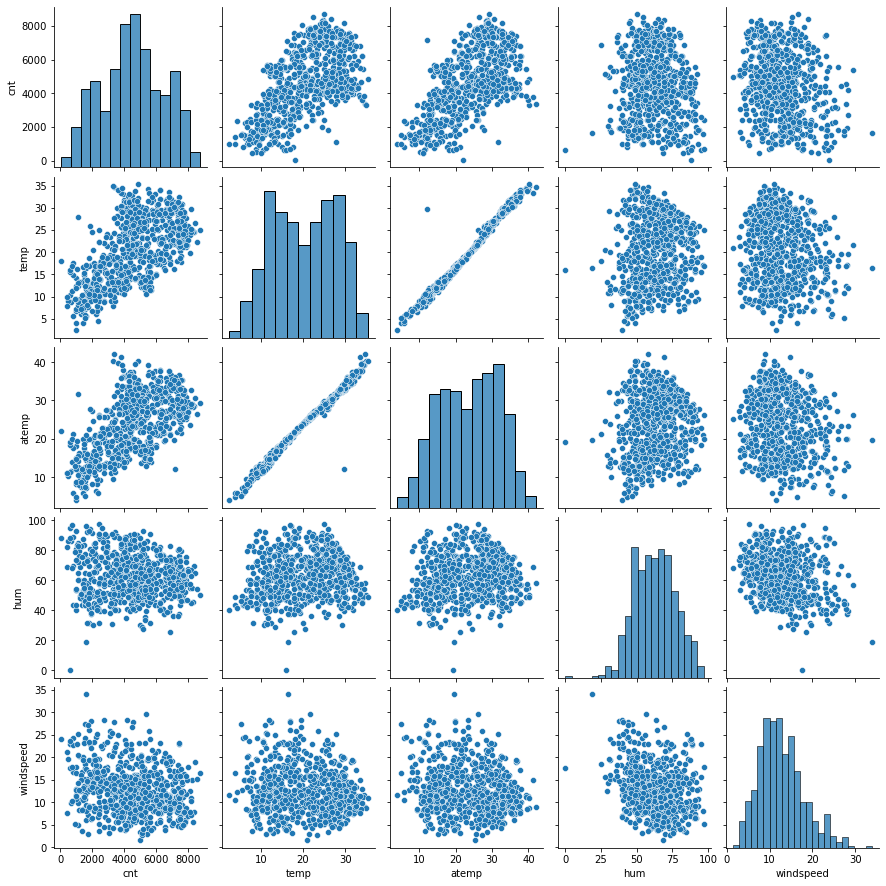

In [83]:
sns.pairplot(df, vars=num_vars)

###### 2.Categorical Data

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

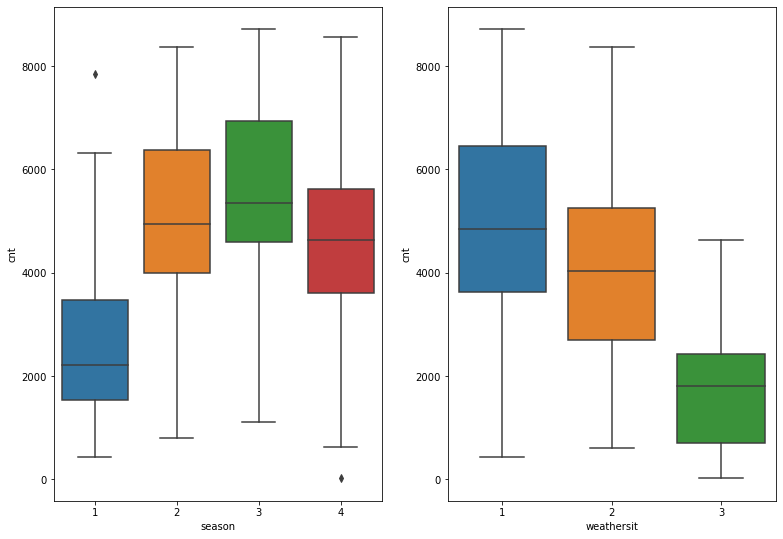

In [84]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)


##### Seasons
1 - Spring
2 - Summer
3 - Fall
4 - Winter

##### Weathersit

1 - Clear
2 - Mist & Cloudy
3 - Light Snow & Rain
4 - Heavy Snow & Rain

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

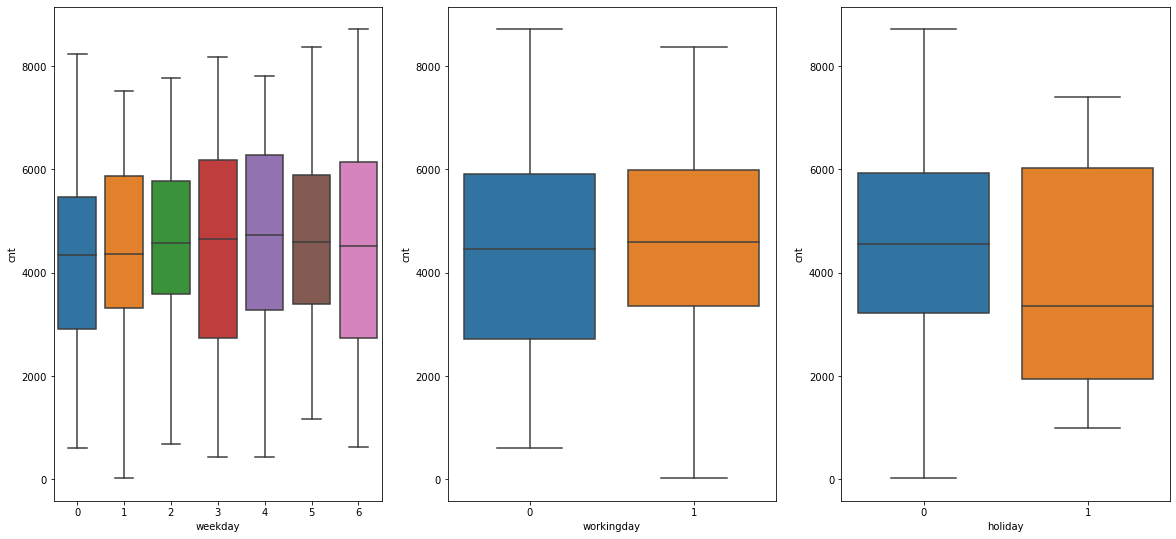

In [85]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)



<AxesSubplot:xlabel='yr', ylabel='cnt'>

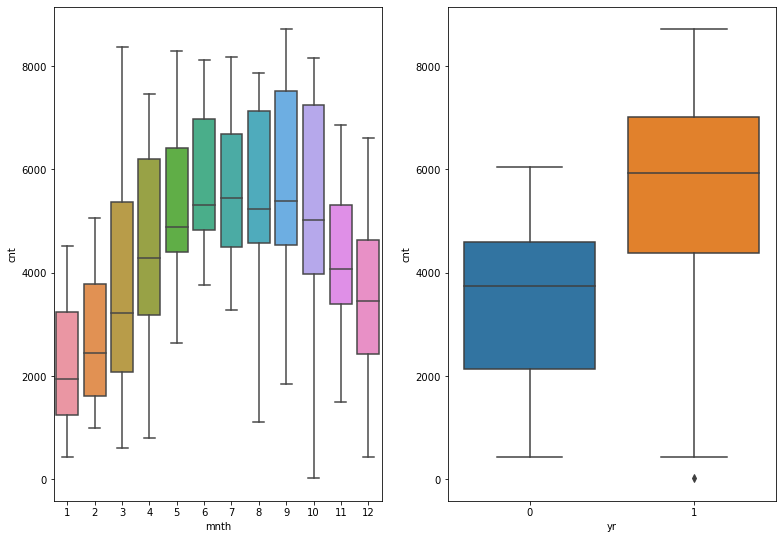

In [86]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

### Observations from the plot
1. The Spring Season has very low count of bike sharing , I guess spring is suitable walking and aslo for roamtic walk people opt to walk
2. From the observation from the data set it is known that people don't use bike sharing in heavysnow or rain
3. Bike sharing is high in clear weather condition,ie..(Clear, Few clouds, Partly cloudy, Partly cloudy)
4. The number of bike shares incresed in 2019
5. The Bike sharing are increases in summer months
6. The Bike sharing are less during holidays

### 3. Preparing Data

###### 1. Dropping Data 

In [87]:
df.drop(['instant','dteday','casual','registered'], axis=1,inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [88]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


###### 2. Mapping data's

a. Mapping Season

In [89]:
df['season'] = df['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [90]:
df['season'].describe()

count      730
unique       4
top       Fall
freq       188
Name: season, dtype: object

<AxesSubplot:xlabel='season', ylabel='count'>

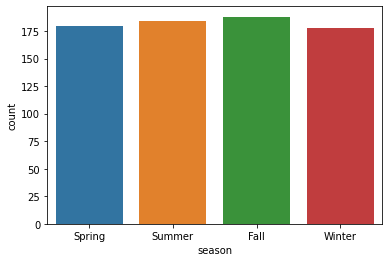

In [91]:
sns.countplot(df['season'])

b. Mapping Weather Condition


In [92]:
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [93]:
df['weathersit'].describe()

count       730
unique        3
top       Clear
freq        463
Name: weathersit, dtype: object

<AxesSubplot:xlabel='weathersit', ylabel='count'>

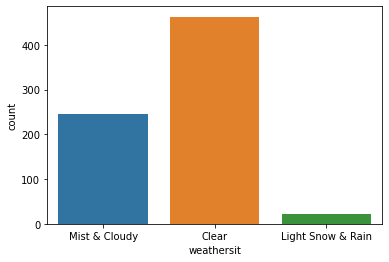

In [94]:
sns.countplot(df['weathersit'])

c. Mapping weekdays

In [95]:
df['weekday'] = df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

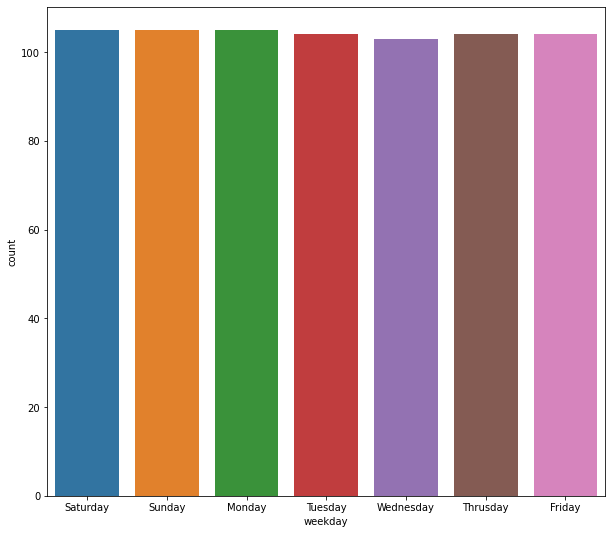

In [96]:
plt.figure(figsize=(10,9))
sns.countplot(df['weekday'])
plt.show()

#####  Converting month to categorical value for future use

In [97]:
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [98]:
df.head(51)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.181250,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.686950,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.470250,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.606100,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.463500,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thrusday,1,Clear,8.378268,11.660450,51.8261,6.000868,1606
6,Spring,0,Jan,0,Friday,1,Mist & Cloudy,8.057402,10.441950,49.8696,11.304642,1510
7,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,6.765000,8.112700,53.5833,17.875868,959
8,Spring,0,Jan,0,Sunday,0,Clear,5.671653,5.808750,43.4167,24.250650,822
9,Spring,0,Jan,0,Monday,1,Clear,6.184153,7.544400,48.2917,14.958889,1321


### Creating Dummy Variables 

In [99]:
dummy = df[['season','mnth','weekday','weathersit']]

In [100]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [101]:
dummy.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [102]:
df = pd.concat([dummy,df],axis=1)

In [103]:
df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [104]:
df.columns.value_counts()

season_Spring                   1
holiday                         1
weekday_Wednesday               1
weathersit_Light Snow & Rain    1
weathersit_Mist & Cloudy        1
season                          1
yr                              1
mnth                            1
weekday                         1
season_Summer                   1
workingday                      1
weathersit                      1
temp                            1
atemp                           1
hum                             1
windspeed                       1
weekday_Tuesday                 1
weekday_Thrusday                1
weekday_Sunday                  1
weekday_Saturday                1
weekday_Monday                  1
mnth_Sep                        1
mnth_Oct                        1
mnth_Nov                        1
mnth_May                        1
mnth_Mar                        1
mnth_Jun                        1
mnth_Jul                        1
mnth_Jan                        1
mnth_Feb      

In [105]:
df.shape

(730, 34)

In [106]:
#Dropping columns 
df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [107]:
df.shape

(730, 30)

### 4.Splitting and Re-scaling Data

In [108]:
#splitting data
train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [109]:
#Rescaling 

scaler = MinMaxScaler()
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [110]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [111]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Dividing Training Data Set

In [112]:
y_train = train.pop("cnt")
X_train = train

In [113]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


In [114]:
#Creating LinearRegression Object
lm = LinearRegression()
#fitting the model
lm.fit(X_train,y_train)

LinearRegression()

### Selecting Top 12 features using RFE

In [115]:
rfe = RFE(lm, 12) 
rfe = rfe.fit(X_train, y_train)

#### Viewing columns with RFE Score

In [116]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 12),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 11),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 13),
 ('weekday_Wednesday', False, 16),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [117]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

## 6.  Creating Models 

### Model 1

In [119]:
X_train_rfe = X_train[rfe_col]

In [120]:
#adding constant
X_train_lm = sm.add_constant(X_train_rfe)

In [121]:
#fitting model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [122]:
#lm.params

In [123]:
print(lm.summary())


                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1403.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        20:12:47   Log-Likelihood:                          476.80
No. Observations:                 510   AIC:                                     -929.6
Df Residuals:                     498   BIC:                                     -878.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [124]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.35
1,season_Summer,2.78
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


#### Observation :
It is observed that hum has high VIF score and high p-value so creating model with dropping that column

### Model 2 

In [125]:
X_train_2 = X_train_lm.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X_train_2)
lm = sm.OLS(y_train,X_train_lm).fit()

In [126]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.40e-187
Time:                        20:12:48   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [127]:
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.57
1,season_Spring,4.95
10,temp,3.38
3,season_Winter,3.35
2,season_Summer,2.59
4,mnth_Jul,1.48
5,mnth_Sep,1.29
11,windspeed,1.09
6,weathersit_Light Snow & Rain,1.05
7,weathersit_Mist & Cloudy,1.04


#### Observation :
Still const column has low p-value it have very high VIF so we are dropping it and creating new model

###  Model 3

In [128]:
X_train_3 = X_train_lm.drop(["const"], axis = 1)
X_train_lm = sm.add_constant(X_train_3)
lm = sm.OLS(y_train,X_train_lm).fit()

In [129]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.40e-187
Time:                        20:12:49   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [130]:
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


# 7. Residual Analysis

In [131]:
y_train_res = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

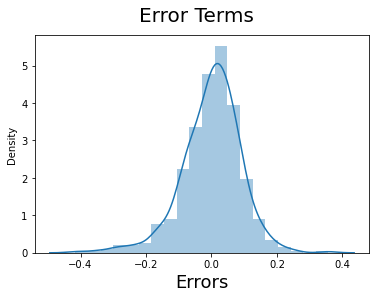

In [132]:
fig = plt.figure()
sns.distplot((y_train - y_train_res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)                 

# 8. Prediction using Final Model

In [133]:
num_vars = ['cnt','hum','windspeed','temp','atemp']
test[num_vars] = scaler.fit_transform(test[num_vars])

In [134]:
test.shape

(219, 30)

In [135]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Dividing Data set

In [136]:
y_test = test.pop('cnt')
X_test = test

In [137]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 29)


In [138]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [139]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jul                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   weathersit_Mist & Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   holiday                       219 non-null    int64  
 10  temp                          219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


### 9. Prediction

In [140]:
y_pred = lm.predict(X_test)

In [141]:
print("R2-Score : ",r2_score(y_test,y_pred).round(2))

R2-Score :  0.79


In [142]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MeanSquaredError = ",mse)

MeanSquaredError =  0.011647442897404566


### 10. Evaluvating Model

Text(0, 0.5, 'y_pred')

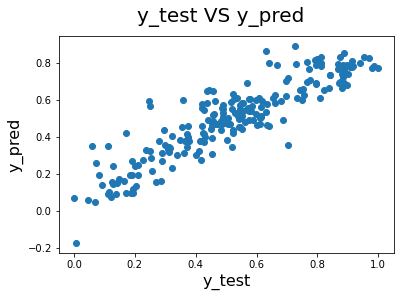

In [143]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test VS y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 16)                         
plt.ylabel('y_pred', fontsize = 16)  

In [144]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_Winter,0.083084
5,mnth_Sep,0.076686
2,season_Summer,0.045280
4,mnth_Jul,-0.052418
1,season_Spring,-0.066942
7,weathersit_Mist & Cloudy,-0.081558



cnt = 0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X seasonWinter + 0.076686 X mnth_Sep  + 0.045280 X season_Summer -0.052418 X  mnth_Jul - 0.066942 X season_Spring - 0.081558 X weathersit_Mist & Cloudy	- 0.098013 X holiday - 0.147977 X windspeed - 0.285155 X weathersit_Light Snow & Rain	

#### The possible variables : temp,yr,season-winter,mnth_Sep,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt

#### The negative variables : mnth_Jul,season_Spring,weathersit_Mist & Cloudy,holiday,windspeed,weathersit_Light Snow & Rain	indicate that an increase in these values will lead to an deccrease in the value of cnt

## Final Observation

1. Temperature has the highest impact
2. In the month of september (Spring) the bike rental is high
3. The renatal is very low in holidays

#### Temperature and Season has the higer impact on deciding the bike rental